In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
%matplotlib inline

In [7]:
raw_data = pd.read_excel("Tiers_Training.xlsx")

In [8]:
raw_data.shape

(68254, 12)

In [9]:
raw_data.describe()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,DATA_DIS_DATE
count,68254.000000,68254.000000,68254.000000,68254.000000,0.0
mean,31.483378,78.279463,142.207122,4.119319,NaN
std,472.615990,42.540667,66.817341,1.774441,NaN
min,-76189.120000,-415.413000,-593.210000,1.000000,NaN
25%,46.230000,56.628000,106.030900,3.000000,NaN
50%,52.770000,77.400000,146.276250,4.000000,NaN
75%,59.970000,97.499000,180.245025,5.000000,NaN
max,848.800000,2751.172000,2819.690000,9.000000,NaN


In [10]:
raw_data.head()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,LEC_STRT_DATE,LEC_DIS_DATE,DATA_STRT_DATE,DATA_DIS_DATE,VIDEO_STRT_DATE,VIDEO_DIS_DATE,SERVICE_NME
0,54.05,91.324,168.9617,5,N,2007-11-17,NaT,2007-11-17,NaN,2007-11-17,NaT,"Voice, Data, Video"
1,50.16,48.672,97.0333,2,N,2012-01-05,2011-12-25,2012-01-05,NaN,2012-01-05,NaT,"Voice, Data, Video"
2,55.24,84.535,153.0320,4,N,2012-04-17,2012-03-22,2012-06-02,NaN,2012-06-02,NaT,"Voice, Data, Video"
3,55.43,15.912,28.7067,1,N,2011-02-08,NaT,NaT,NaN,NaT,NaT,Voice
4,93.15,99.689,107.0200,5,N,2011-12-09,NaT,NaT,NaN,NaT,NaT,"Data, Video"


In [11]:
empty = np.where(pd.isnull(raw_data))

In [12]:
len(empty[0])

220761

In [13]:
hold_dtypes = raw_data.get_dtype_counts()

print(hold_dtypes)

datetime64[ns]    5
float64           4
int64             1
object            2
dtype: int64


In [14]:
cols = raw_data.columns
numeric = raw_data._get_numeric_data().columns
hold_category_col_name = list(set(cols) - set(numeric))

In [15]:
hold_category = raw_data[hold_category_col_name]

In [16]:
print(hold_category_col_name)

['LEC_STRT_DATE', 'DATA_STRT_DATE', 'VIDEO_DIS_DATE', 'LEC_DIS_DATE', 'FINAL_BILL_FLG', 'VIDEO_STRT_DATE', 'SERVICE_NME']


In [19]:
raw_data['LEC_STRT_DATE_Y'] = pd.DatetimeIndex(raw_data['LEC_STRT_DATE']).year
raw_data['LEC_STRT_DATE_M'] = pd.DatetimeIndex(raw_data['LEC_STRT_DATE']).month
raw_data['LEC_STRT_DATE_D'] = pd.DatetimeIndex(raw_data['LEC_STRT_DATE']).day
raw_data.head()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,LEC_STRT_DATE,LEC_DIS_DATE,DATA_STRT_DATE,DATA_DIS_DATE,VIDEO_STRT_DATE,VIDEO_DIS_DATE,SERVICE_NME,LEC_STRT_DATE_Y,LEC_STRT_DATE_M,LEC_STRT_DATE_D
0,54.05,91.324,168.9617,5,N,2007-11-17,NaT,2007-11-17,NaN,2007-11-17,NaT,"Voice, Data, Video",2007.0,11.0,17.0
1,50.16,48.672,97.0333,2,N,2012-01-05,2011-12-25,2012-01-05,NaN,2012-01-05,NaT,"Voice, Data, Video",2012.0,1.0,5.0
2,55.24,84.535,153.0320,4,N,2012-04-17,2012-03-22,2012-06-02,NaN,2012-06-02,NaT,"Voice, Data, Video",2012.0,4.0,17.0
3,55.43,15.912,28.7067,1,N,2011-02-08,NaT,NaT,NaN,NaT,NaT,Voice,2011.0,2.0,8.0
4,93.15,99.689,107.0200,5,N,2011-12-09,NaT,NaT,NaN,NaT,NaT,"Data, Video",2011.0,12.0,9.0


In [20]:
raw_data['DATA_STRT_DATE_Y'] = pd.DatetimeIndex(raw_data['DATA_STRT_DATE']).year
raw_data['DATA_STRT_DATE_M'] = pd.DatetimeIndex(raw_data['DATA_STRT_DATE']).month
raw_data['DATA_STRT_DATE_D'] = pd.DatetimeIndex(raw_data['DATA_STRT_DATE']).day
raw_data.head()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,LEC_STRT_DATE,LEC_DIS_DATE,DATA_STRT_DATE,DATA_DIS_DATE,VIDEO_STRT_DATE,VIDEO_DIS_DATE,SERVICE_NME,LEC_STRT_DATE_Y,LEC_STRT_DATE_M,LEC_STRT_DATE_D,DATA_STRT_DATE_Y,DATA_STRT_DATE_M,DATA_STRT_DATE_D
0,54.05,91.324,168.9617,5,N,2007-11-17,NaT,2007-11-17,NaN,2007-11-17,NaT,"Voice, Data, Video",2007.0,11.0,17.0,2007.0,11.0,17.0
1,50.16,48.672,97.0333,2,N,2012-01-05,2011-12-25,2012-01-05,NaN,2012-01-05,NaT,"Voice, Data, Video",2012.0,1.0,5.0,2012.0,1.0,5.0
2,55.24,84.535,153.0320,4,N,2012-04-17,2012-03-22,2012-06-02,NaN,2012-06-02,NaT,"Voice, Data, Video",2012.0,4.0,17.0,2012.0,6.0,2.0
3,55.43,15.912,28.7067,1,N,2011-02-08,NaT,NaT,NaN,NaT,NaT,Voice,2011.0,2.0,8.0,NaN,NaN,NaN
4,93.15,99.689,107.0200,5,N,2011-12-09,NaT,NaT,NaN,NaT,NaT,"Data, Video",2011.0,12.0,9.0,NaN,NaN,NaN


In [21]:
raw_data['VIDEO_DIS_DATE_Y'] = pd.DatetimeIndex(raw_data['VIDEO_DIS_DATE']).year
raw_data['VIDEO_DIS_DATE_M'] = pd.DatetimeIndex(raw_data['VIDEO_DIS_DATE']).month
raw_data['VIDEO_DIS_DATE_D'] = pd.DatetimeIndex(raw_data['VIDEO_DIS_DATE']).day
raw_data.head()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,LEC_STRT_DATE,LEC_DIS_DATE,DATA_STRT_DATE,DATA_DIS_DATE,VIDEO_STRT_DATE,...,SERVICE_NME,LEC_STRT_DATE_Y,LEC_STRT_DATE_M,LEC_STRT_DATE_D,DATA_STRT_DATE_Y,DATA_STRT_DATE_M,DATA_STRT_DATE_D,VIDEO_DIS_DATE_Y,VIDEO_DIS_DATE_M,VIDEO_DIS_DATE_D
0,54.05,91.324,168.9617,5,N,2007-11-17,NaT,2007-11-17,NaN,2007-11-17,...,"Voice, Data, Video",2007.0,11.0,17.0,2007.0,11.0,17.0,NaN,NaN,NaN
1,50.16,48.672,97.0333,2,N,2012-01-05,2011-12-25,2012-01-05,NaN,2012-01-05,...,"Voice, Data, Video",2012.0,1.0,5.0,2012.0,1.0,5.0,NaN,NaN,NaN
2,55.24,84.535,153.0320,4,N,2012-04-17,2012-03-22,2012-06-02,NaN,2012-06-02,...,"Voice, Data, Video",2012.0,4.0,17.0,2012.0,6.0,2.0,NaN,NaN,NaN
3,55.43,15.912,28.7067,1,N,2011-02-08,NaT,NaT,NaN,NaT,...,Voice,2011.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,93.15,99.689,107.0200,5,N,2011-12-09,NaT,NaT,NaN,NaT,...,"Data, Video",2011.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
raw_data['LEC_DIS_DATE_Y'] = pd.DatetimeIndex(raw_data['LEC_DIS_DATE']).year
raw_data['LEC_DIS_DATE_M'] = pd.DatetimeIndex(raw_data['LEC_DIS_DATE']).month
raw_data['LEC_DIS_DATE_D'] = pd.DatetimeIndex(raw_data['LEC_DIS_DATE']).day
raw_data.head()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,LEC_STRT_DATE,LEC_DIS_DATE,DATA_STRT_DATE,DATA_DIS_DATE,VIDEO_STRT_DATE,...,LEC_STRT_DATE_D,DATA_STRT_DATE_Y,DATA_STRT_DATE_M,DATA_STRT_DATE_D,VIDEO_DIS_DATE_Y,VIDEO_DIS_DATE_M,VIDEO_DIS_DATE_D,LEC_DIS_DATE_Y,LEC_DIS_DATE_M,LEC_DIS_DATE_D
0,54.05,91.324,168.9617,5,N,2007-11-17,NaT,2007-11-17,NaN,2007-11-17,...,17.0,2007.0,11.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
1,50.16,48.672,97.0333,2,N,2012-01-05,2011-12-25,2012-01-05,NaN,2012-01-05,...,5.0,2012.0,1.0,5.0,NaN,NaN,NaN,2011.0,12.0,25.0
2,55.24,84.535,153.0320,4,N,2012-04-17,2012-03-22,2012-06-02,NaN,2012-06-02,...,17.0,2012.0,6.0,2.0,NaN,NaN,NaN,2012.0,3.0,22.0
3,55.43,15.912,28.7067,1,N,2011-02-08,NaT,NaT,NaN,NaT,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93.15,99.689,107.0200,5,N,2011-12-09,NaT,NaT,NaN,NaT,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
raw_data['VIDEO_STRT_DATE_Y'] = pd.DatetimeIndex(raw_data['VIDEO_STRT_DATE']).year
raw_data['VIDEO_STRT_DATE_M'] = pd.DatetimeIndex(raw_data['VIDEO_STRT_DATE']).month
raw_data['VIDEO_STRT_DATE_D'] = pd.DatetimeIndex(raw_data['VIDEO_STRT_DATE']).day
raw_data.head()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,LEC_STRT_DATE,LEC_DIS_DATE,DATA_STRT_DATE,DATA_DIS_DATE,VIDEO_STRT_DATE,...,DATA_STRT_DATE_D,VIDEO_DIS_DATE_Y,VIDEO_DIS_DATE_M,VIDEO_DIS_DATE_D,LEC_DIS_DATE_Y,LEC_DIS_DATE_M,LEC_DIS_DATE_D,VIDEO_STRT_DATE_Y,VIDEO_STRT_DATE_M,VIDEO_STRT_DATE_D
0,54.05,91.324,168.9617,5,N,2007-11-17,NaT,2007-11-17,NaN,2007-11-17,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2007.0,11.0,17.0
1,50.16,48.672,97.0333,2,N,2012-01-05,2011-12-25,2012-01-05,NaN,2012-01-05,...,5.0,NaN,NaN,NaN,2011.0,12.0,25.0,2012.0,1.0,5.0
2,55.24,84.535,153.0320,4,N,2012-04-17,2012-03-22,2012-06-02,NaN,2012-06-02,...,2.0,NaN,NaN,NaN,2012.0,3.0,22.0,2012.0,6.0,2.0
3,55.43,15.912,28.7067,1,N,2011-02-08,NaT,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93.15,99.689,107.0200,5,N,2011-12-09,NaT,NaT,NaN,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
raw_data = raw_data.drop(['VIDEO_STRT_DATE','LEC_DIS_DATE','VIDEO_DIS_DATE','DATA_STRT_DATE','LEC_STRT_DATE'], axis = 1)

In [25]:
hold_dtypes = raw_data.get_dtype_counts()

print(hold_dtypes)

float64    19
int64       1
object      2
dtype: int64


In [26]:
cols = raw_data.columns
numeric = raw_data._get_numeric_data().columns
hold_category_col_name = list(set(cols) - set(numeric))
hold_category = raw_data[hold_category_col_name]
print(hold_category_col_name)

['FINAL_BILL_FLG', 'SERVICE_NME']


In [27]:
hold_category_unique_values = []
for i in range(len(hold_category_col_name)):
    hold_category_unique_values.append(hold_category[hold_category_col_name[i]].unique())
    
for i in range(len(hold_category_unique_values)):
    print(hold_category_col_name[i]," : ",hold_category_unique_values[i])

FINAL_BILL_FLG  :  ['N' 'Y']
SERVICE_NME  :  ['Voice, Data, Video' 'Voice' 'Data, Video' 'Voice, Video' 'Voice, Data'
 'Video' 'Data' 'None']


In [30]:
raw_data.FINAL_BILL_FLG = raw_data.FINAL_BILL_FLG.replace({'N' : 0, 'Y' : 1})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [32]:
pd.value_counts(raw_data.FINAL_BILL_FLG)  # skewed

0    67363
1      891
Name: FINAL_BILL_FLG, dtype: int64

In [34]:
raw_data = pd.get_dummies(raw_data,columns = ['SERVICE_NME'])

In [35]:
raw_data.describe()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,DATA_DIS_DATE,LEC_STRT_DATE_Y,LEC_STRT_DATE_M,LEC_STRT_DATE_D,DATA_STRT_DATE_Y,...,VIDEO_STRT_DATE_M,VIDEO_STRT_DATE_D,SERVICE_NME_Data,"SERVICE_NME_Data, Video",SERVICE_NME_None,SERVICE_NME_Video,SERVICE_NME_Voice,"SERVICE_NME_Voice, Data","SERVICE_NME_Voice, Data, Video","SERVICE_NME_Voice, Video"
count,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,0.0,59755.000000,59755.000000,59755.000000,54707.000000,...,54539.000000,54539.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000
mean,31.483378,78.279463,142.207122,4.119319,0.013054,NaN,2008.706251,6.446507,15.904711,2009.322463,...,6.503163,15.872330,0.034181,0.116916,0.005274,0.036613,0.046356,0.074882,0.654335,0.031441
std,472.615990,42.540667,66.817341,1.774441,0.113508,NaN,2.781860,3.461728,8.768401,2.061659,...,3.397942,8.785963,0.181696,0.321323,0.072434,0.187812,0.210257,0.263203,0.475588,0.174509
min,-76189.120000,-415.413000,-593.210000,1.000000,0.000000,NaN,1965.000000,1.000000,1.000000,2005.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.230000,56.628000,106.030900,3.000000,0.000000,NaN,2007.000000,3.000000,8.000000,2007.000000,...,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.770000,77.400000,146.276250,4.000000,0.000000,NaN,2009.000000,6.000000,16.000000,2010.000000,...,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,59.970000,97.499000,180.245025,5.000000,0.000000,NaN,2011.000000,9.000000,23.000000,2011.000000,...,9.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,848.800000,2751.172000,2819.690000,9.000000,1.000000,NaN,2012.000000,12.000000,31.000000,2012.000000,...,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
raw_data.fillna(0)

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,DATA_DIS_DATE,LEC_STRT_DATE_Y,LEC_STRT_DATE_M,LEC_STRT_DATE_D,DATA_STRT_DATE_Y,...,VIDEO_STRT_DATE_M,VIDEO_STRT_DATE_D,SERVICE_NME_Data,"SERVICE_NME_Data, Video",SERVICE_NME_None,SERVICE_NME_Video,SERVICE_NME_Voice,"SERVICE_NME_Voice, Data","SERVICE_NME_Voice, Data, Video","SERVICE_NME_Voice, Video"
0,54.05,91.324,168.9617,5,0,0.0,2007.0,11.0,17.0,2007.0,...,11.0,17.0,0,0,0,0,0,0,1,0
1,50.16,48.672,97.0333,2,0,0.0,2012.0,1.0,5.0,2012.0,...,1.0,5.0,0,0,0,0,0,0,1,0
2,55.24,84.535,153.0320,4,0,0.0,2012.0,4.0,17.0,2012.0,...,6.0,2.0,0,0,0,0,0,0,1,0
3,55.43,15.912,28.7067,1,0,0.0,2011.0,2.0,8.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,0
4,93.15,99.689,107.0200,5,0,0.0,2011.0,12.0,9.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
5,56.48,140.218,248.2617,5,0,0.0,2006.0,8.0,4.0,2006.0,...,8.0,4.0,0,0,0,0,0,0,1,0
6,55.66,69.159,124.2533,3,0,0.0,0.0,0.0,0.0,2010.0,...,1.0,30.0,0,1,0,0,0,0,0,0
7,61.62,88.808,144.1225,4,0,0.0,2012.0,6.0,8.0,2012.0,...,6.0,8.0,0,0,0,0,0,0,1,0
8,45.14,60.988,135.1083,3,0,0.0,2010.0,7.0,12.0,2011.0,...,11.0,17.0,0,0,0,0,0,0,1,0
9,52.59,84.416,160.5167,4,0,0.0,2007.0,6.0,11.0,2007.0,...,6.0,11.0,0,0,0,0,0,0,1,0


In [49]:
pd.value_counts(raw_data.values.flatten())

 0.0000       545557
 1.0000        95237
 5.0000        46175
 2011.0000     42265
 4.0000        38086
 2012.0000     35138
 3.0000        34118
 2007.0000     29282
 2.0000        27375
 2008.0000     26097
 7.0000        25303
 9.0000        24387
 8.0000        23925
 6.0000        22915
 2010.0000     22619
 12.0000       21732
 10.0000       21428
 11.0000       18846
 2009.0000     15879
 2006.0000     15364
 22.0000        7864
 28.0000        7755
 19.0000        7652
 13.0000        7563
 16.0000        7490
 25.0000        6429
 23.0000        5945
 21.0000        5860
 27.0000        5788
 20.0000        5722
               ...  
 118.9230          1
 109.2140          1
-28.2300           1
 117.0133          1
 142.5833          1
 78.3460           1
 121.9280          1
 195.4696          1
 100.3870          1
 101.6130          1
 104.9067          1
 83.1670           1
 65.2790           1
 44.7883           1
 122.9470          1
 121.0530          1
 101.8733    

In [53]:
raw_data.describe()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,DATA_DIS_DATE,LEC_STRT_DATE_Y,LEC_STRT_DATE_M,LEC_STRT_DATE_D,DATA_STRT_DATE_Y,...,VIDEO_STRT_DATE_M,VIDEO_STRT_DATE_D,SERVICE_NME_Data,"SERVICE_NME_Data, Video",SERVICE_NME_None,SERVICE_NME_Video,SERVICE_NME_Voice,"SERVICE_NME_Voice, Data","SERVICE_NME_Voice, Data, Video","SERVICE_NME_Voice, Video"
count,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,0.0,59755.000000,59755.000000,59755.000000,54707.000000,...,54539.000000,54539.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000
mean,31.483378,78.279463,142.207122,4.119319,0.013054,NaN,2008.706251,6.446507,15.904711,2009.322463,...,6.503163,15.872330,0.034181,0.116916,0.005274,0.036613,0.046356,0.074882,0.654335,0.031441
std,472.615990,42.540667,66.817341,1.774441,0.113508,NaN,2.781860,3.461728,8.768401,2.061659,...,3.397942,8.785963,0.181696,0.321323,0.072434,0.187812,0.210257,0.263203,0.475588,0.174509
min,-76189.120000,-415.413000,-593.210000,1.000000,0.000000,NaN,1965.000000,1.000000,1.000000,2005.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.230000,56.628000,106.030900,3.000000,0.000000,NaN,2007.000000,3.000000,8.000000,2007.000000,...,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.770000,77.400000,146.276250,4.000000,0.000000,NaN,2009.000000,6.000000,16.000000,2010.000000,...,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,59.970000,97.499000,180.245025,5.000000,0.000000,NaN,2011.000000,9.000000,23.000000,2011.000000,...,9.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,848.800000,2751.172000,2819.690000,9.000000,1.000000,NaN,2012.000000,12.000000,31.000000,2012.000000,...,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
raw_data = raw_data.drop('DATA_DIS_DATE', axis = 1)

In [58]:
raw_data.describe()

,MARGIN_PCT_6MON,CALC_MARGIN,BLLD_REVENUE_6MON_PER_SUBS,CHRN_MGMT_TIERS,FINAL_BILL_FLG,LEC_STRT_DATE_Y,LEC_STRT_DATE_M,LEC_STRT_DATE_D,DATA_STRT_DATE_Y,DATA_STRT_DATE_M,...,VIDEO_STRT_DATE_M,VIDEO_STRT_DATE_D,SERVICE_NME_Data,"SERVICE_NME_Data, Video",SERVICE_NME_None,SERVICE_NME_Video,SERVICE_NME_Voice,"SERVICE_NME_Voice, Data","SERVICE_NME_Voice, Data, Video","SERVICE_NME_Voice, Video"
count,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,59755.000000,59755.000000,59755.000000,54707.000000,54707.000000,...,54539.000000,54539.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000,68254.000000
mean,31.483378,78.279463,142.207122,4.119319,0.013054,2008.706251,6.446507,15.904711,2009.322463,6.561665,...,6.503163,15.872330,0.034181,0.116916,0.005274,0.036613,0.046356,0.074882,0.654335,0.031441
std,472.615990,42.540667,66.817341,1.774441,0.113508,2.781860,3.461728,8.768401,2.061659,3.372056,...,3.397942,8.785963,0.181696,0.321323,0.072434,0.187812,0.210257,0.263203,0.475588,0.174509
min,-76189.120000,-415.413000,-593.210000,1.000000,0.000000,1965.000000,1.000000,1.000000,2005.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.230000,56.628000,106.030900,3.000000,0.000000,2007.000000,3.000000,8.000000,2007.000000,4.000000,...,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.770000,77.400000,146.276250,4.000000,0.000000,2009.000000,6.000000,16.000000,2010.000000,7.000000,...,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,59.970000,97.499000,180.245025,5.000000,0.000000,2011.000000,9.000000,23.000000,2011.000000,9.000000,...,9.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,848.800000,2751.172000,2819.690000,9.000000,1.000000,2012.000000,12.000000,31.000000,2012.000000,12.000000,...,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
empty = np.where(pd.isnull(raw_data))

In [64]:
len(empty[0])

457521

In [65]:
y = np.bincount(empty[1])
ii = np.nonzero(y)[0]
hold = np.vstack((ii,y[ii])).T
print(len(hold))

15


In [66]:
raw_data = raw_data.dropna(how = 'all',axis = 1)

In [67]:
empty = np.where(pd.isnull(raw_data))
len(empty[0])

457521

In [68]:
y = np.bincount(empty[1])
ii = np.nonzero(y)[0]
hold = np.vstack((ii,y[ii])).T
print(len(hold))

15


In [69]:
raw_data = raw_data.fillna(raw_data.mean())

In [70]:
empty = np.where(pd.isnull(raw_data))
len(empty[0])

0

In [71]:
y_class = raw_data['CHRN_MGMT_TIERS']
X_class = raw_data.drop('CHRN_MGMT_TIERS', axis = 1)

In [72]:
from sklearn.cross_validation import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestClassifier
hold_clf = RandomForestClassifier(n_estimators=5,max_depth=5,random_state = 12)
hold_clf.fit(X_class,y_class)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

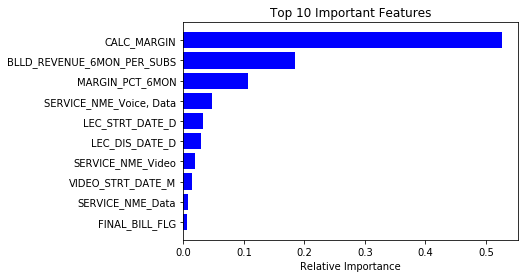

In [94]:
# -- Variable importance --
impclass = hold_clf.feature_importances_
indices = np.argsort(impclass)
features = raw_data.columns
indices = indices[17:]
plt.title('Top 10 Important Features')
plt.barh(range(len(indices)), impclass[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [95]:
# -- Random Forest Classifier --
def RFavg(ne, md):
    clf = RandomForestClassifier(n_estimators = ne, max_depth = md, random_state = 0)
    print("Inside RF:", ne)
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy').mean()
    clf.fit(X_train_class,y_train_class)
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores, tester

In [96]:
holdRFtr = []
holdRFte = []
for i in range (2,15):
    tr, te = RFavg(i,i)
    holdRFtr.append(tr)
    holdRFte.append(te)

print(holdRFtr, holdRFte)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 9
Inside RF: 10
Inside RF: 11
Inside RF: 12
Inside RF: 13
Inside RF: 14
[0.5407767695311311, 0.7787111174511143, 0.7932360710776714, 0.8502665199008501, 0.9066717388375565, 0.9352044831237418, 0.9511205835545138, 0.9618153946147665, 0.9674559646458846, 0.970789210849629, 0.973407933262082, 0.9746167613797361, 0.9756238258937747] [0.5537323273020291, 0.7879276243498645, 0.7993553585817889, 0.845432569042561, 0.9143652479671819, 0.9411764705882353, 0.9546553366053769, 0.9579517984030474, 0.969233023221742, 0.9742143432715552, 0.9753131638707787, 0.9757526921104681, 0.977291040949381]


In [97]:
def GB(ne):
    clf = ensemble.GradientBoostingClassifier(n_estimators = ne, max_depth = ne, max_leaf_nodes = ne, random_state = 0, learning_rate=0.1)
    print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy') 
    scores_avg = sum(scores)/len(scores)
    # prepare for test
    clf.fit(X_train_class, y_train_class)
    # predict on test
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores_avg, tester

In [98]:
holdGBtr = []
holdGBte = []
for i in range (2,20):
    tr, te = GB(i)
    holdGBtr.append(tr)
    holdGBte.append(te)

print(holdGBtr, holdGBte)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 9
Inside RF: 10
Inside RF: 11
Inside RF: 12
Inside RF: 13
Inside RF: 14
Inside RF: 15
Inside RF: 16
Inside RF: 17
Inside RF: 18
Inside RF: 19
[0.9346556495222247, 0.9346739410271996, 0.9562662522425184, 0.9628959840773694, 0.9679504632534799, 0.9696353209688138, 0.9710271484327976, 0.9724191066698478, 0.9739208879263301, 0.9750014137333757, 0.9755324654137404, 0.9764663805011924, 0.9768326708331643, 0.9771257010820525, 0.9773637896322338, 0.9777483916164534, 0.9778582850911836, 0.9782062436359189] [0.939931140575782, 0.9397113764559373, 0.9597831660684198, 0.9646179767050033, 0.9680609479159036, 0.9698190608746612, 0.9715039191268039, 0.9731155226723317, 0.9746538715112446, 0.9756061826972383, 0.9766317485898469, 0.9775108050692257, 0.9776573144824555, 0.9780968427221449, 0.9783898615486045, 0.9786828803750641, 0.9788293897882939, 0.9789026444949088]


In [99]:
holdGBtr = holdGBtr[:14]

In [100]:
holdGBte = holdGBte[:14]

In [104]:
holdGBtr = holdGBtr[:13]
holdGBte = holdGBte[:13]

In [105]:
print(len(holdRFtr),len(holdGBtr))

13 13


In [ ]:
def lda():
    clf = LinearDiscriminantAnalysis()
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy', verbose = True)
    scores_avga = sum(scores)/len(scores)
#     print(scores)
    clf.fit(X_train_class, y_train_class)
    # predict on test
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores_avga,tester


In [ ]:
print(lda())

In [ ]:
def qda():
    clf = QuadraticDiscriminantAnalysis()
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy', verbose = True)
    scores_avga = sum(scores)/len(scores)
#     print(scores)
    clf.fit(X_train_class, y_train_class)
    # predict on test
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores_avga,tester


In [ ]:
print(qda())

In [102]:
def AdaB(ne):
    clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=ne),n_estimators = ne, learning_rate=0.1)
    print("Inside RF:", ne)
    # cross validate on train
    scores = cross_val_score(clf, X_train_class, y_train_class, cv = 10, scoring = 'accuracy').mean()
    # prepare for test
    clf.fit(X_train_class, y_train_class)
    # predict on test
    predicted = clf.predict(X_test_class)
    # check accuracy for tested results
    tester = accuracy_score(y_test_class, predicted)
    return scores, tester

In [103]:
holdAdatr = []
holdAdate = []
for i in range (2,15):
    tr, te = AdaB(i)
    holdAdatr.append(tr)
    holdAdate.append(te)

print(holdAdatr, holdAdate)

Inside RF: 2
Inside RF: 3
Inside RF: 4
Inside RF: 5
Inside RF: 6
Inside RF: 7
Inside RF: 8
Inside RF: 9
Inside RF: 10
Inside RF: 11
Inside RF: 12
Inside RF: 13
Inside RF: 14
[0.8912329997395185, 0.9055358750017378, 0.9493619461306109, 0.9596176761251769, 0.9646537631741939, 0.9723640240875835, 0.9740123591414619, 0.973279657780556, 0.9737008092663432, 0.9730233111760509, 0.97229065338242, 0.9724371702021719, 0.9717227636803741] [0.9335579811002856, 0.8961980807266867, 0.9526774595267746, 0.9624935902131712, 0.9634459013991649, 0.9750201450443191, 0.975093399750934, 0.9754596732840085, 0.9739945791517105, 0.9740678338583254, 0.9737015603252509, 0.9741410885649403, 0.9737748150318658]


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


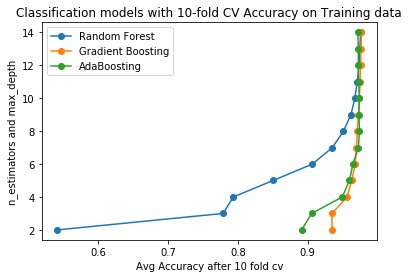

In [107]:
bag = [i for i in range(2,15)]
print(bag)
# print((md_ne_for_avg))
plt.plot(holdRFtr,bag,'-o',label = 'Random Forest')
plt.plot(holdGBtr,bag,'-o',label = 'Gradient Boosting')
plt.plot(holdAdatr,bag,'-o',label = 'AdaBoosting')
plt.xlabel('Avg Accuracy after 10 fold cv')
plt.ylabel('n_estimators and max_depth')
plt.title('Classification models with 10-fold CV Accuracy on Training data')
plt.legend()

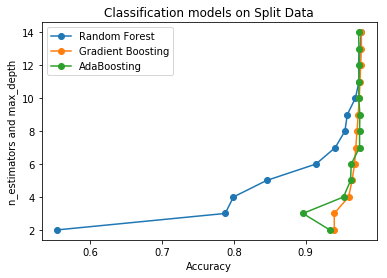

In [122]:
plt.plot(holdRFte,bag,'-o',label = 'Random Forest')
plt.plot(holdGBte,bag,'-o',label = 'Gradient Boosting')
plt.plot(holdAdate,bag,'-o',label = 'AdaBoosting')
plt.xlabel('Accuracy')
plt.ylabel('n_estimators and max_depth')
plt.title('Classification models on Split Data')
plt.legend()

In [110]:
# Going with XGBoosting with hyperparameters as '3'
clf = ensemble.GradientBoostingClassifier(n_estimators = 3, max_depth = 3, max_leaf_nodes = 3, random_state = 0, learning_rate=0.1)

In [111]:
# fit all the training data
clf.fit(X_class,y_class)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=3,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
              random_state=0, subsample=1.0, verbose=0, warm_start=False)

In [115]:
# preparing test data
test_data = pd.read_excel("Tiers_Testing.xlsx")

In [116]:
test_data['LEC_STRT_DATE_Y'] = pd.DatetimeIndex(test_data['LEC_STRT_DATE']).year
test_data['LEC_STRT_DATE_M'] = pd.DatetimeIndex(test_data['LEC_STRT_DATE']).month
test_data['LEC_STRT_DATE_D'] = pd.DatetimeIndex(test_data['LEC_STRT_DATE']).day
test_data['DATA_STRT_DATE_Y'] = pd.DatetimeIndex(test_data['DATA_STRT_DATE']).year
test_data['DATA_STRT_DATE_M'] = pd.DatetimeIndex(test_data['DATA_STRT_DATE']).month
test_data['DATA_STRT_DATE_D'] = pd.DatetimeIndex(test_data['DATA_STRT_DATE']).day
test_data['VIDEO_DIS_DATE_Y'] = pd.DatetimeIndex(test_data['VIDEO_DIS_DATE']).year
test_data['VIDEO_DIS_DATE_M'] = pd.DatetimeIndex(test_data['VIDEO_DIS_DATE']).month
test_data['VIDEO_DIS_DATE_D'] = pd.DatetimeIndex(test_data['VIDEO_DIS_DATE']).day
test_data['LEC_DIS_DATE_Y'] = pd.DatetimeIndex(test_data['LEC_DIS_DATE']).year
test_data['LEC_DIS_DATE_M'] = pd.DatetimeIndex(test_data['LEC_DIS_DATE']).month
test_data['LEC_DIS_DATE_D'] = pd.DatetimeIndex(test_data['LEC_DIS_DATE']).day
test_data['VIDEO_STRT_DATE_Y'] = pd.DatetimeIndex(test_data['VIDEO_STRT_DATE']).year
test_data['VIDEO_STRT_DATE_M'] = pd.DatetimeIndex(test_data['VIDEO_STRT_DATE']).month
test_data['VIDEO_STRT_DATE_D'] = pd.DatetimeIndex(test_data['VIDEO_STRT_DATE']).day
test_data = test_data.drop(['VIDEO_STRT_DATE','LEC_DIS_DATE','VIDEO_DIS_DATE','DATA_STRT_DATE','LEC_STRT_DATE'], axis = 1)
test_data.FINAL_BILL_FLG = test_data.FINAL_BILL_FLG.replace({'N' : 0, 'Y' : 1})
test_data = pd.get_dummies(test_data,columns = ['SERVICE_NME'])
test_data = test_data.drop('DATA_DIS_DATE', axis = 1)
test_data = test_data.fillna(test_data.mean())

In [117]:
y_test = test_data['CHRN_MGMT_TIERS']
X_test = test_data.drop('CHRN_MGMT_TIERS', axis = 1)

In [118]:
predicted = clf.predict(X_test)

In [119]:
tester = accuracy_score(y_test, predicted)

In [120]:
print(tester)

0.9361091170136396
